# Module 8 Lab Assignment

In [ ]:
import pandas as pd
import numpy as np

In this lab, you will work a dataset that belongs to a MOOC. The dataset contains the following columns:

* **StudentId**: Id of the student
* **Age**: The age of the student
* **Education**: The education level of the student. 1: Highschool, 2: Undergrad, 3: Master, 4: PhD.
* **Exam1**: First midterm score [ranges between 0 to 100]
* **Exam2**: Second midterm score [ranges between 0 to 100]
* **Final**: Final exam score [ranges between 0 to 100]
* **Discussion**: Number of discussion posts
* **Tutorial**: Number of visits to tutorial pages
* **Video**: Number of views of course videos
* **Assignment**: Number of assignments submitted [ranges between 0 to 4].

**TASK#1:** Import the data into a dataframe called `data`, and display the top 3 columns:

`[+3]`

In [ ]:
data = pd.read_excel('student-data.xlsx')
data.head(3)

,StudentId,Age,Education,Exam1,Exam2,Final,Discussion,Tutorial,Video,Assignment
0,10,23,1,45.0,55,60.0,1,16,13,2
1,72,16,1,65.0,33,40.0,3,5,7,2
2,82,17,1,68.0,48,35.0,3,8,20,2


**TASK#2:** There are some missing values in some columns. Display the count of missing values per each column. 

The output should look like this:

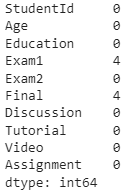

`[+3]`

In [ ]:
data.isnull().sum()

StudentId     0
Age           0
Education     0
Exam1         4
Exam2         0
Final         4
Discussion    0
Tutorial      0
Video         0
Assignment    0
dtype: int64

**TASK#3:** Fill the missing values in `Exam1` column with the average `Exam1` of the `Education` level that the student belongs to. 

For example, assume that student A's `Exam1` score is unknown. This student's education level is *Higher Education*. Then, the `Exam1` score of this student should be set to the average `Exam1` score of all students from *Higher Education*. 

`[+10]`

In [ ]:
fill_mean = lambda g: g.fillna(g.median())

data['Exam1'] = data.groupby('Education')['Exam1'].apply(fill_mean)

**TASK#4:** Fill the missing values in `Final` column with the student's average score in `Exam1` and `Exam2`. In this task the education level does not matter.

HINT: You can simply use `fillna` method on `Final` column (no `apply` or `lambda` function is necessary).

`[+8]`

In [ ]:
data['Final'] = data['Final'].fillna((data['Exam1']+data['Exam2'])/2)
data.head(20)

,StudentId,Age,Education,Exam1,Exam2,Final,Discussion,Tutorial,Video,Assignment
0,10,23,1,45.0,55,60.0,1,16,13,2
1,72,16,1,65.0,33,40.0,3,5,7,2
2,82,17,1,68.0,48,35.0,3,8,20,2
3,83,20,1,29.0,24,42.0,2,20,13,3
4,93,24,1,54.0,37,61.0,0,5,10,4
5,111,22,1,50.0,61,62.0,1,17,14,1
6,118,18,1,64.0,33,55.0,2,12,5,3
7,127,24,1,39.0,31,23.0,3,5,7,1
8,128,16,1,34.0,26,20.0,1,16,13,4
9,151,18,1,54.0,61,55.0,2,13,13,1


**TASK#5:** In this task, you need to replace the values in `Education` column with proper labels, given in the following dictionary:

In [ ]:
educationDict = { 1: '1.Highschool', 2:'2.Undergrad', 3:'3.Master', 4:'4.PhD' }

Now, pass this dictionary into `replace` function, to update the values in the `Education` column:

`[+5]`

In [ ]:
data['Education'].replace(educationDict, inplace=True)
data.head(2)

,StudentId,Age,Education,Exam1,Exam2,Final,Discussion,Tutorial,Video,Assignment
0,10,23,1.Highschool,45.0,55,60.0,1,16,13,2
1,72,16,1.Highschool,65.0,33,40.0,3,5,7,2


**TASK#6:** Now, we are interested in if there is a difference in exam performances depending on the education level. 

Please use `groupby` to compute the average scores of *Exam1*, *Exam2*, and *Final* for each `Education` level. 

`[+8]`

In [ ]:
data_byEd = data.groupby('Education')[['Exam1',	'Exam2','Final']].mean()
data_byEd

,Exam1,Exam2,Final
Education,,,
1.Highschool,47.697674,44.912791,44.712209
2.Undergrad,60.128492,70.402235,75.064246
3.Master,78.537634,78.720430,78.639785
4.PhD,80.461988,79.228070,79.745614


**TASK#7**: Based on the dataset obtained in the previous task, please find for which Education level there is an increase in the average scores from Exam1 to Exam2 and from Exam2 to Final.

Here, you can utilize `pct_change` function.

The output of your code should look like this:

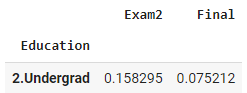
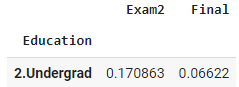

`[+12]`

In [ ]:
data_byEd_pct = data_byEd.pct_change(axis=1).dropna(axis=1)
data_byEd_pct

,Exam2,Final
Education,,
1.Highschool,-0.058386,-0.004466
2.Undergrad,0.170863,0.066220
3.Master,0.002327,-0.001024
4.PhD,-0.015335,0.006532


In [ ]:
data_byEd_pct[(data_byEd_pct['Exam2'] > 0) & (data_byEd_pct['Final'] > 0)]

,Exam2,Final
Education,,
2.Undergrad,0.170863,0.06622


**TASK#8:** The `Assignment` column indicates the number of submissions submitted by the students (between 0-4). It is expected that students who submit their assignments will show better performance in the final exam.

To explore this relationship, please compute the average `Final` grade for each distinct vauel of `Assignment` column.

Make a one-sentence comment about the relationship between the number of assignments submitted and the final scores.

`[+7]`

In [ ]:
data.groupby(['Assignment'])[['Final']].mean()

,Final
Assignment,
0,62.138211
1,64.358333
2,70.723684
3,75.142857
4,74.434483


**TASK#9:** In this task, the goal is to construct a new dataframe that has two columns: 

* `ExamAvg` (the average of `Exam1`, `Exam2`, and `Final`)
* `Visits` (the average of the `Tutorial` and `Video` columns). 

You should use `groupby` function and pass a dictionary (possible called *mapping*) to this function.

Below is a sample view from the output:

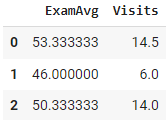

`[+8]`

In [ ]:
mapping = {'Exam1':'ExamAvg', 'Exam2':'ExamAvg', 'Final':'ExamAvg', 'Video':'Visits', 'Tutorial': 'Visits'}
data.groupby(mapping, axis=1).mean().head()

,ExamAvg,Visits
0,53.333333,14.5
1,46.000000,6.0
2,50.333333,14.0
3,31.666667,16.5
4,50.666667,7.5


**TASK#10:** Create four bins (or buckets) from the existing data based on students' final grades. The lower-upper boundries for each bin are provided below, along with the labels:

* 0-59: Fails
* 60-69: Low Performers
* 70-84: Medium Performers
* 85-100: High Performers

The expected output is provided below:

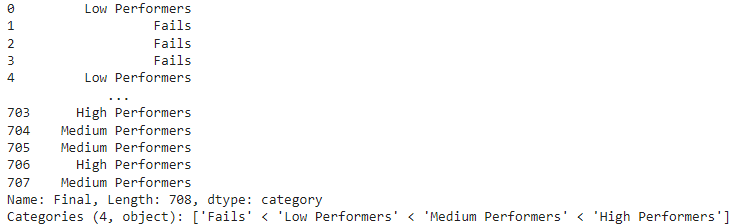

`[+9]`

In [ ]:
catPerf= pd.cut(data.Final, [0, 59, 70, 85, 100], 
                labels=['Fails', 'Low Performers', 'Medium Performers', 'High Performers'])
catPerf

0         Low Performers
1                  Fails
2                  Fails
3                  Fails
4         Low Performers
             ...        
703      High Performers
704    Medium Performers
705    Medium Performers
706      High Performers
707    Medium Performers
Name: Final, Length: 708, dtype: category
Categories (4, object): ['Fails' < 'Low Performers' < 'Medium Performers' < 'High Performers']

**TASK11:** Now, you need to display the number of students at the intersection of performance levels and education levels. We are interested in knowing the educationa levels of high performing students and low performing students.

You can use `crosstab` function. The output should look like this:

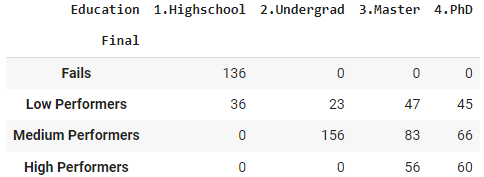

`[+9]`

In [ ]:
pd.crosstab(catPerf, data['Education'])

Education,1.Highschool,2.Undergrad,3.Master,4.PhD
Final,,,,
Fails,136,0,0,0
Low Performers,36,23,47,45
Medium Performers,0,156,83,66
High Performers,0,0,56,60


**TASK#12:** In the following several tasks, we are interested in exploring if students' age has any effect on their performance.

First, create a equal-length 4 buckets based on the ages of the students.

The output should look like this:

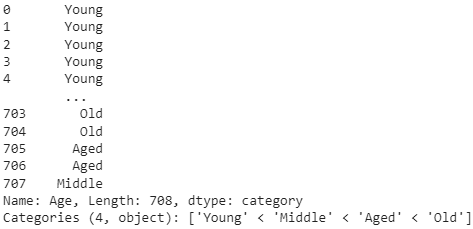

`[+9]`

In [ ]:
catAge = pd.cut(data.Age, 4, labels=['Young', 'Middle', 'Aged', 'Old'])
catAge

0       Young
1       Young
2       Young
3       Young
4       Young
        ...  
703       Old
704       Old
705      Aged
706      Aged
707    Middle
Name: Age, Length: 708, dtype: category
Categories (4, object): ['Young' < 'Middle' < 'Aged' < 'Old']

**TASK13:** Next, group data based on age categories, and compute the followings:

* Exam1, Exam2: *Average*,
* Discussion	Tutorial	Video: *Average, Minimum value, and Maximum Value*

The output should look like this:

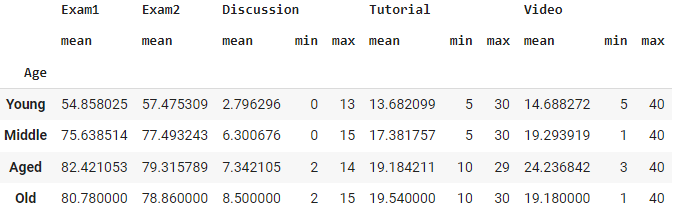

[+9]

In [ ]:
data.groupby(catAge).agg({'Exam1':'mean', 'Exam2':'mean', 
                          'Discussion':['mean','min','max'],	'Tutorial':['mean','min','max'],	
                          'Video':['mean','min','max']})

Exam1      Exam2 Discussion           Tutorial              Video  \
             mean       mean       mean min max       mean min max       mean   
Age                                                                             
Young   54.858025  57.475309   2.796296   0  13  13.682099   5  30  14.688272   
Middle  75.638514  77.493243   6.300676   0  15  17.381757   5  30  19.293919   
Aged    82.421053  79.315789   7.342105   2  14  19.184211  10  29  24.236842   
Old     80.780000  78.860000   8.500000   2  15  19.540000  10  30  19.180000   

                
       min max  
Age             
Young    5  40  
Middle   1  40  
Aged     3  40  
Old      1  40